In [1]:
%matplotlib inline
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpld3
mpld3.enable_notebook()


filepath= '../data/ed_spending_per_student_10-15.csv'
data =  pd.read_csv(filepath)
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2010,9950.004,NaN
1,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2011,10000.179,NaN
2,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2012,10398.065,NaN
3,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2013,10535.674,NaN
4,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2014,10501.547,NaN


In [2]:
data["TIME"] = pd.to_datetime(data["TIME"], format='%Y')
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2010-01-01,9950.004,NaN
1,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2011-01-01,10000.179,NaN
2,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2012-01-01,10398.065,NaN
3,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2013-01-01,10535.674,NaN
4,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2014-01-01,10501.547,NaN


In [ ]:
# data['TIME'] = data['TIME'].astype(object)

In [ ]:
data.head()

In [3]:
new_data = data.drop(['Flag Codes'], axis=1)


In [4]:
data_new = new_data.dropna()
data_new.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2010-01-01,9950.004
1,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2011-01-01,10000.179
2,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2012-01-01,10398.065
3,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2013-01-01,10535.674
4,CAN,EDUEXP,PRY_NTRY,USD_STUDENT,A,2014-01-01,10501.547


In [ ]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


In [ ]:
# data_new.to_csv('../clean_data/ED_doller_10-15.csv', index=False)

In [5]:
df_time = data_new.groupby(['TIME'])


In [6]:
df_country = data_new.groupby(['LOCATION'])

In [ ]:
#  df_10 = df_time.get_group(2010)
#  df_11 = df_time.get_group(2011)
#  df_12 = df_time.get_group(2012)
#  df_13 = df_time.get_group(2013) 
#  df_14 = df_time.get_group(2014)
#  df_15 = df_time.get_group(2015)

In [ ]:
# plt.bar(df_10['LOCATION'], df_10['Value'])

# plt.bar(df_11['LOCATION'], df_11['Value'])
# plt.title('test')
# plt.show()
df_country.head()

In [7]:
can_df = df_country.get_group('CAN')
fin_df = df_country.get_group('FIN')
fra_df = df_country.get_group('FRA')
deu_df = df_country.get_group('DEU')
jpn_df = df_country.get_group('JPN')
kor_df = df_country.get_group('KOR')
mex_df = df_country.get_group('MEX')
gbr_df = df_country.get_group('GBR')
usa_df = df_country.get_group('USA')

In [10]:
data = can_df

ValueError: Unrecognized character V in format string

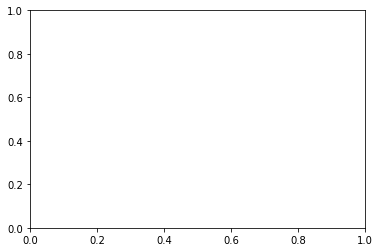

In [11]:
fig, ax = plt.subplots()
ax.plot('TIME', 'VALUE', data = data )

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(data['TIME'][0], 'Y')
datemax = np.datetime64(data['TIME'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

fig.autofmt_xdate()

plt.show()


In [ ]:
# fig = plt.figure()
# plt.rc('lines', linewidth=2, linestyle='-', marker='*')
 
# plt.rcParams["figure.figsize"] = (11, 9)

 
# plt.plot('TIME','Value', data = can_df, label = 'canada ')
# plt.plot('TIME','Value', data = fin_df, label = 'finland')
# plt.plot('TIME','Value', data = fra_df, label = 'france')
# plt.plot('TIME','Value', data = deu_df, label = 'Germany')
# plt.plot('TIME','Value', data = jpn_df, label = 'Japan')
# plt.plot('TIME','Value', data = kor_df, label = 'Korea')
# # plt.plot('TIME','Value', data = mex_df, label = 'Mexico')
# plt.plot('TIME','Value', data = gbr_df, label = 'United kingdom')
# plt.plot('TIME','Value', data = usa_df, label = 'United States')

# plt.xlabel('years', fontsize =18)
# plt.ylabel('Per Student cost', fontsize =18)
# plt.title('Education Cost Per Student for Ten Cournty', fontsize =18)
# plt.legend(ncol=2,loc="lower right", fontsize = 15)
# plt.grid(b=True, which='major', color='#666666', linestyle='-')

# plt.show()

In [ ]:
print(mpld3.fig_to_html(fig, template_type="general"))

In [ ]:
# g = sns.FacetGrid(data_new, row="TIME", margin_titles=True,  height=3, aspect=4)
#  g.map(plt.bar,"LOCATION" ,"Value", color="steelblue")